In [1]:
# Comment:  Imports and Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import xgboost as xgb
from sklearn.metrics import mean_squared_error

from math import sqrt
from sklearn import preprocessing

%matplotlib inline
plt.style.use('seaborn')
plotColors = (list(mcolors.TABLEAU_COLORS)+list(mcolors.TABLEAU_COLORS)+list(mcolors.TABLEAU_COLORS))[:23]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = '/content/drive/My Drive/PotatoBlight.xls'
df = pd.read_excel(path)

In [ ]:
backup = df.copy()

In [ ]:
df = df.drop(['Date','jd','Tmin>8','Tmax<25','Rain','Count of IP requirements',\
                        '1 if count=3', 'Season'], axis=1)

In [ ]:
def get_mean_last_three_weeks(ds):
  mean_value = 0
  rows = ds.shape[0]
  meanlast3 = np.zeros(rows)
  mean_value = np.sum(ds[:2])
  meanlast3[:2] = mean_value / 2
  for i in range(2, rows):
      mean_value += ds[i]
      meanlast3[i] = mean_value / 3
      mean_value -= ds[i-2]
  return meanlast3

In [ ]:
df['lastDS'] = df['Daily blight obsrv.'].shift()
meanlast3DS = get_mean_last_three_weeks(np.array(df['Daily blight obsrv.']))
df['meanlast3DS'] = meanlast3DS
df.head()

,DAP,TMIN,TMAX,TMEAN,Rain days>0.1mm,GDD,Accu. GDD,Daily blight obsrv.,IP Result,lastDS,meanlast3DS
0,40,19.1,29.0,24.05,0,14.05,14.05,0.0,0,NaN,0.0
1,41,17.8,31.1,24.45,0,14.45,28.50,0.0,0,0.0,0.0
2,42,18.8,31.9,25.35,0,15.35,43.85,0.0,0,0.0,0.0
3,43,20.3,29.0,24.65,0,14.65,58.50,0.0,0,0.0,0.0
4,44,19.8,29.1,24.45,0,14.45,72.95,0.0,0,0.0,0.0


In [ ]:
df.dropna(inplace=True)
df.head()

,DAP,TMIN,TMAX,TMEAN,Rain days>0.1mm,GDD,Accu. GDD,Daily blight obsrv.,IP Result,lastDS,meanlast3DS
1,41,17.8,31.1,24.45,0,14.45,28.50,0.0,0,0.0,0.0
2,42,18.8,31.9,25.35,0,15.35,43.85,0.0,0,0.0,0.0
3,43,20.3,29.0,24.65,0,14.65,58.50,0.0,0,0.0,0.0
4,44,19.8,29.1,24.45,0,14.45,72.95,0.0,0,0.0,0.0
5,45,13.9,28.1,21.00,0,11.00,83.95,0.0,0,0.0,0.0


In [ ]:
column_names =['DAP','TMIN','TMAX','TMEAN','Rain days>0.1mm','GDD','Accu. GDD','IP Result',\
               'lastDS','meanlast3DS','Daily blight obsrv.']
df = df.reindex(columns=column_names)

In [ ]:
X, y = df.iloc[:,:-1],df.iloc[:,-1]

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:

objective = "reg:linear"
seed = 100
n_estimators = 100
learning_rate = 0.1
gamma = 0.1
subsample = 0.8
colsample_bytree =1
reg_alpha = 0.5
reg_lambda = 0.5
silent = False
max_depth = 6
min_child_weight = 0
subsample = 1.0

parameters = {}
parameters['objective'] = objective
parameters['seed'] = seed
parameters['n_estimators'] = n_estimators
parameters['learning_rate'] = learning_rate
parameters['gamma'] = gamma
parameters['colsample_bytree'] = colsample_bytree
parameters['reg_alpha'] = reg_alpha
parameters['reg_lambda'] = reg_lambda
parameters['silent'] = silent


xg_reg = xgb.XGBRegressor(
                                        objective = objective,
                                        seed = seed,
                                        n_estimators = n_estimators,
                                        learning_rate = learning_rate,
                                        gamma = gamma,
                                        subsample = subsample,
                                        colsample_bytree = colsample_bytree,
                                        reg_alpha = reg_alpha,
                                        reg_lambda = reg_lambda,
                                        silent = silent

                                    )
                    
              






In [ ]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[13:52:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
rrmse = np.sqrt(mean_squared_error(y_test, preds))/np.mean(y_test)
print("RMSE: %f" % (rmse*100))
print("RRMSE: %f " % (rrmse*100))

RMSE: 107.462796
RRMSE: 5.699606 


In [ ]:
cv_results = xgb.cv(dtrain=data_dmatrix, params=parameters, nfold=200,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse",\
                    as_pandas=True, seed=seed)


[13:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,29.034829,0.121705,17.612590,23.104879
1,26.202793,0.109355,15.916877,20.845125
2,23.648485,0.098363,14.381776,18.823950
3,21.345080,0.088551,12.965526,16.960722
4,19.266975,0.078621,11.739464,15.345689


In [ ]:
rmse =cv_results["test-rmse-mean"].tail(1)
rrmse =(rmse/np.mean(y_test))*100
print("RRMSE: %f " % (rrmse))

RRMSE: 3.590200 


In [ ]:
xg_reg = xgb.train(params=parameters, dtrain=data_dmatrix, num_boost_round=10)

[13:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


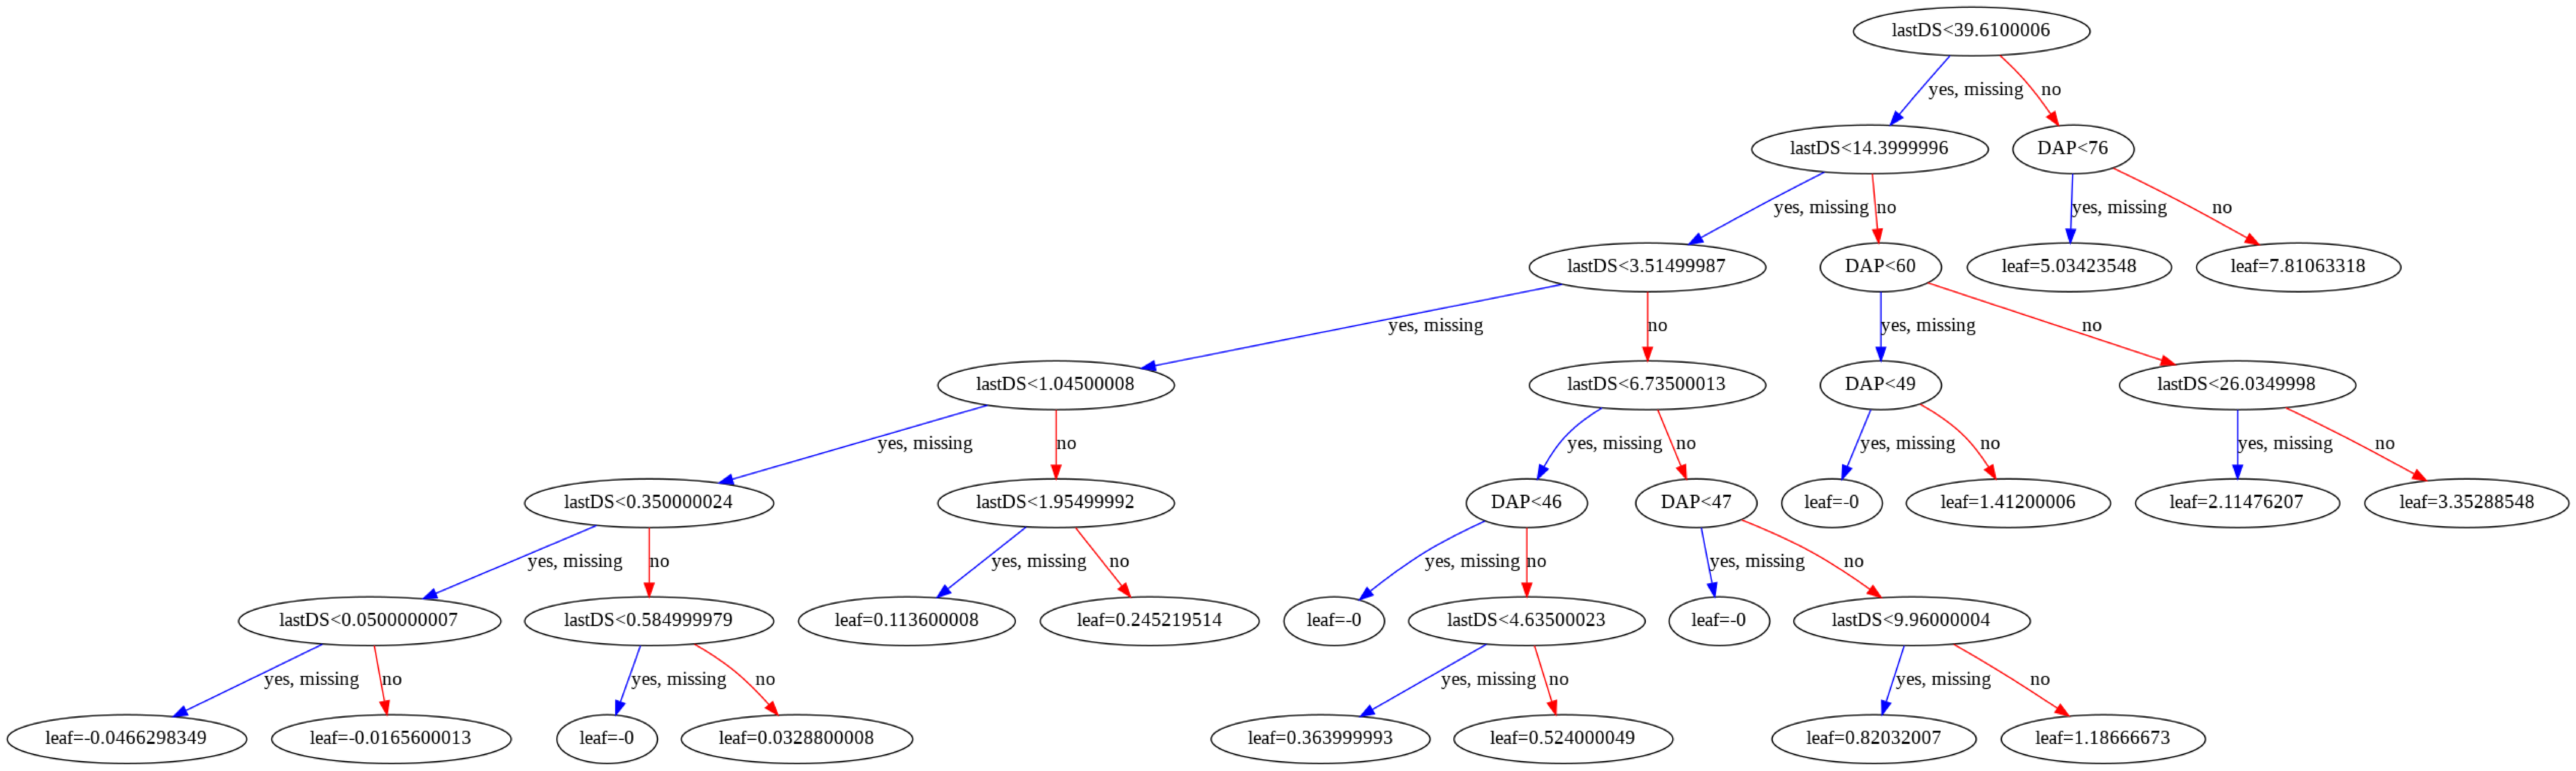

In [ ]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [30, 60]
plt.show()

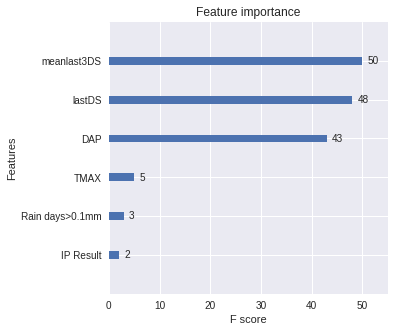

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [7, 5]
plt.show()